<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_05_Correlatie_Lineaire_Regressie_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Correlatie & lineaire regressie opdracht - League of legends
<img src="Lol.jpg">

</br>
</br>



<img src="League of legends.jpg">

Voor een korte uitleg over League of Legends bekijk dit [youtube filmpje](https://www.youtube.com/watch?v=BGtROJeMPeE&feature=youtu.be)

Het bestand 'LoL_team_stats.csv' bevat:

| Variable Name |Description |
| --- | --- |
|kills	|number of kills by the entire team (numeric)|
|deaths|	number of deaths in the entire team (numeric)|
|assists|	 number of assists by the entire team (numeric)|
|killingsprees  |	amount of killing sprees of the entire team (numeric)|
|double kills|	amount of double kills by the entire team (numeric)|
|tripple kills|	amount of tripple kills by the entire team (numeric)|
|totdmgdealt|	total damage dealt by the entire team (numeric)|
|totdmgtochamp	| total damage dealt by the entire team to enemy champions (numeric) |
|totheal |	total amount of damage healed by the entire team (numeric)|
|totunitshealed |	total amount of units healed by the entire team (numeric|
|dmgtoobj |	total damage to objectives(turret, nexus, inhibitor) by the entire team|
|dmgtoturrets |	total damage to turrets (numeric)|
|visionscore |	total vision score by the entire team(numeric)|
|totdmgtaken |	total damage taken by the entire team (numeric)|
|goldearned |	total amount of gold earned by the entire team(numeric)|
|goldspent  |	total amount of gold spent by the entire team(numeric)|
|turretkills |	number of turretkills by the entire team (numeric)|
|inhibkills | number of turretkills by the entire team (numeric)|
|totminionskilled | number of minions killed by the entire team(numeric)|
|neutralminionskilled | number of minions killed in the jungle (numeric)|
|totcctimedealt | total crowd control time (ability to directly hinder a unit's ability to fight e.g. a stun) dealt (numeric)|
|pinksbought| number of vision wards bought (https://leagueoflegends.fandom.com/wiki/Vision_Ward) (numeric)|
|wardsbought| numer of wards bought (numeric)|
|wardsplaced| number of wards placed (numeric)|
|wardskilled | number of wards killed (numeric)|
|largestkillingspree| the largest killing spree of the team (numeric)|
|largestmultikill | largest multi kill of the team (numeric)|
|largestcrit| largest critical strike of the team (numeric)|
|ownjunglekills| amount of own jungle kills (numeric)|
|enemyjunglekills| amount of enemy jungle kills (numeric) |
|win | Wheter the team won or lost (binary: 0:Loss, 1: Win) |


Deze statistieken zijn afkomstig van teams die aan "the red side" spelen

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

import scipy
import scipy.stats

In [ ]:
dataset = pd.read_csv('LoL_team_stats.csv')
dataset.head()

,kills,deaths,assists,killingsprees,doublekills,triplekills,totdmgdealt,totdmgtochamp,totheal,totunitshealed,dmgtoobj,dmgtoturrets,visionscore,totdmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,totcctimedealt,pinksbought,wardsbought,wardsplaced,wardskilled,largestkillingspree,largestmultikill,largestcrit,ownjunglekills,enemyjunglekills,win
0,39,20,56,9,1,0,693679,104497,22618,8,66422,23578,138,94699,67965,63133,8,2,661,132,1735,7,0,54,10,12,2,843,81,30,1
1,32,20,41,7,3,1,436371,69090,13829,11,40373,27746,80,72978,53872,44493,6,2,499,87,1137,2,0,41,5,6,3,1211,41,28,1
2,33,39,45,10,2,1,671974,110564,49455,7,47074,15259,116,166427,68135,57945,6,0,759,114,2137,0,0,69,1,4,3,486,51,48,1
3,45,28,70,10,4,0,478826,90721,23158,12,63302,21778,115,117501,62032,54033,7,1,568,57,1312,3,0,49,5,8,2,817,19,25,1
4,39,32,52,12,1,0,584743,116459,28432,12,36481,24004,78,122907,65539,57500,7,4,665,101,2007,5,0,49,6,5,2,1686,53,34,1


In [ ]:
(rows,cols) = dataset.shape
print("Aantal rijen: ", rows)
print("Aantal kolommen: ", cols)

Aantal rijen:  47581
Aantal kolommen:  31


In [ ]:
dataset.isnull().any()

,0
kills,False
deaths,False
assists,False
killingsprees,False
doublekills,False
triplekills,False
totdmgdealt,False
totdmgtochamp,False
totheal,False
totunitshealed,False


In [ ]:
dataset.shape

(47581, 31)

#### <span style="color:deeppink"> Hoeveel spellen werden er gewonnen en hoeveel spellen werden er verloren? Visualiseer dit aan de hand van de gepaste grafiek en bereken de percentages gewonnen en verloren spellen. </span>

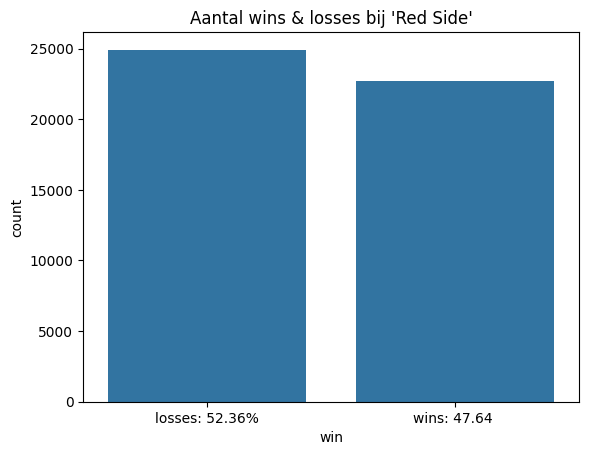

In [ ]:
p_win = dataset["win"].mean()

x_ticks_labels = [f"losses: {100  - p_win  * 100 :.2f}%", f"wins: { p_win * 100 :.2f} "]

sns.countplot(data=dataset, x="win")
plt.title("Aantal wins & losses bij 'Red Side'")
plt.xticks([0, 1], x_ticks_labels)
plt.show()


#### <span style="color:deeppink"> Welke kolom heeft de grootste negatieve impact op een win? En welke de grootste positieve impact?


Correlatie met kolom 'deaths': -0.47
Correlatie met kolom 'turretkills': -0.79


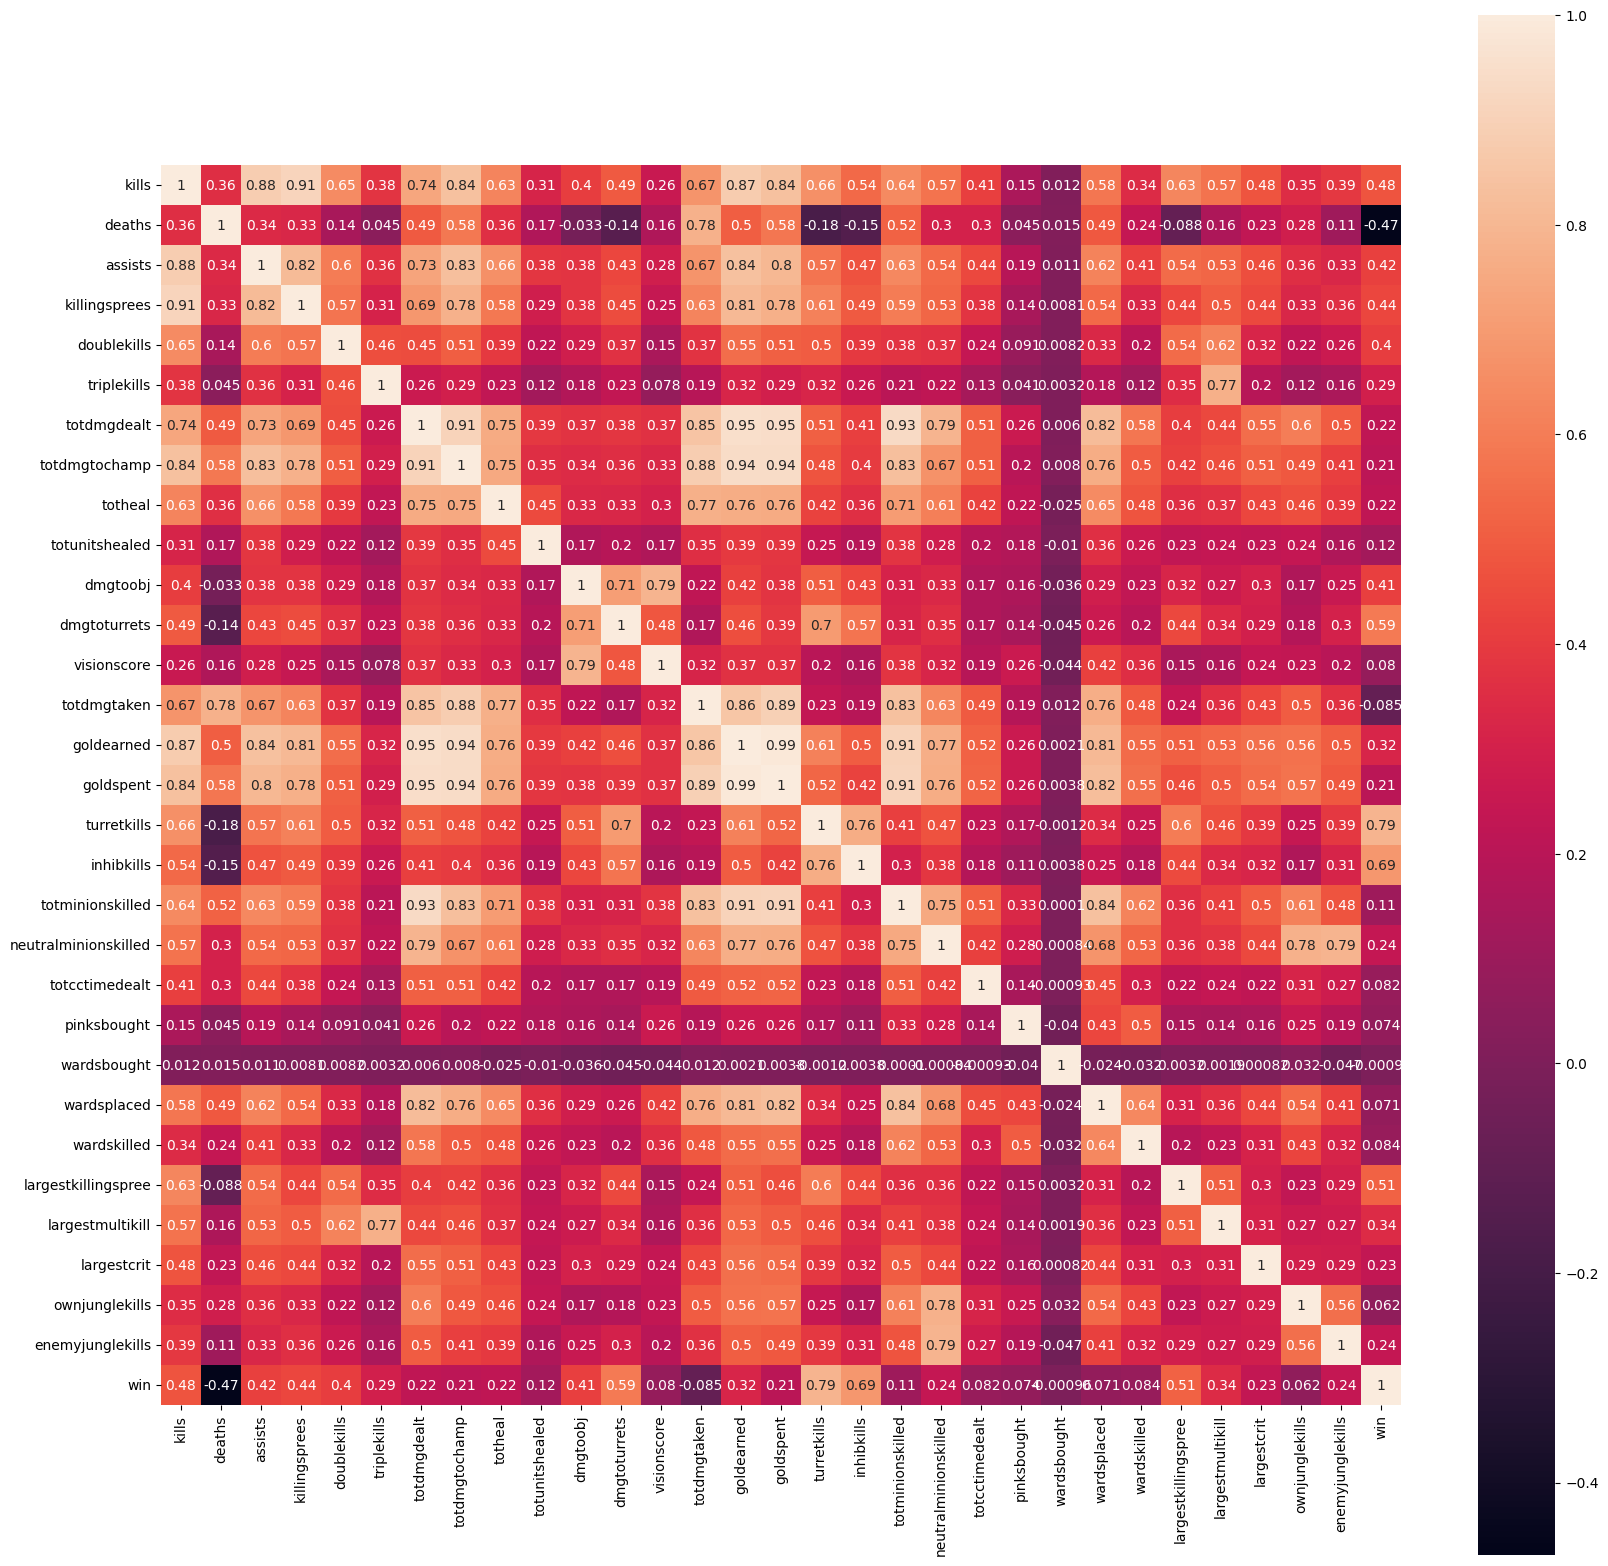

In [ ]:
correlatiecoefficient = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlatiecoefficient, square=True,annot=True)
print("Correlatie met kolom 'deaths': -0.47")
print("Correlatie met kolom 'turretkills': -0.79")


#### <span style="color:deeppink"> Bepaal de correlatie tussen de volgende kolommen:

| kolom 1 | kolom 2 |
| --- | --- |
|total damage dealt	| total minions killed |
|wards placed |	total damage dealt |
|total damage taken	| total healed |
|gold spent |	total damage taken |
|gold spent |	total damage dealt |
|gold spent |	total healed |

In [ ]:
c1 = np.corrcoef(dataset["totdmgdealt"], dataset["totminionskilled"])[0,1]
c2 = np.corrcoef(dataset["wardsplaced"], dataset["totdmgdealt"])[0,1]
c3 = np.corrcoef(dataset["totdmgtaken"], dataset["totheal"])[0,1]
c4 = np.corrcoef(dataset["goldspent"], dataset["totdmgtaken"])[0,1]
c5 = np.corrcoef(dataset["goldspent"], dataset["totdmgdealt"])[0,1]
c6 = np.corrcoef(dataset["goldspent"], dataset["totheal"])[0,1]
print(c1,c2,c3,c4,c5,c6)

0.9318434673375884 0.817562799653662 0.7719440185677939 0.8924579691010108 0.9458968849116106 0.7564625959491946


### **📝 Uitleg van `[0, 1]` in `np.corrcoef()`**

---

#### **🔹 1. Wat `np.corrcoef()` Doet**

De functie **`np.corrcoef()`** berekent de **correlatiematrix** tussen twee of meer datasets.

* **Input:** Twee arrays (bijvoorbeeld **"goldspent"** en **"totheal"**).
* **Output:** Een **matrix** met correlatiecoëfficiënten.

---

#### **🔹 2. Matrix Structuur van `np.corrcoef()`**

De output is een **2x2 matrix** als je **twee** variabelen gebruikt:

```plaintext
[[ 1.00  0.76]
 [ 0.76  1.00]]
```

Hierbij betekent:

* **\[0, 0]**: Correlatie van **"goldspent"** met zichzelf (**altijd 1**).
* **\[1, 1]**: Correlatie van **"totheal"** met zichzelf (**altijd 1**).
* **\[0, 1]**: Correlatie van **"goldspent"** met **"totheal"** (**de waarde die je zoekt**).
* **\[1, 0]**: Correlatie van **"totheal"** met **"goldspent"** (**dezelfde waarde** als \[0, 1]).

---

#### **🔹 3. Waarom `[0, 1]`?**

```python
c6 = np.corrcoef(dataset["goldspent"], dataset["totheal"])[0,1]
```

* **\[0, 1]** betekent dat je de **correlatie** tussen de **eerste** (0) en **tweede** (1) variabele wilt.
* Dit haalt de **off-diagonale** waarde uit de matrix.

---

#### **🔹 4. Voorbeeldoutput:**

Als je deze matrix hebt:

```plaintext
[[ 1.00  0.76]
 [ 0.76  1.00]]
```

* **\[0, 1]** en **\[1, 0]** zijn beide **0.76**, de correlatie tussen **"goldspent"** en **"totheal"**.

---

#### **🔹 5. Alternatief met Pandas**

Je kunt hetzelfde doen met **Pandas**:

```python
c6 = dataset["goldspent"].corr(dataset["totheal"])
```

Dit is korter en duidelijker omdat het **direct** de correlatie geeft zonder een matrix te gebruiken.

---

Zal ik je laten zien hoe je dit kunt gebruiken om een **volledige correlatiematrix** te maken? 😊


#### <span style="color:deeppink"> Bepaal de regressielijn tussen de kills & de total damage to champs

R²-score: 0.70


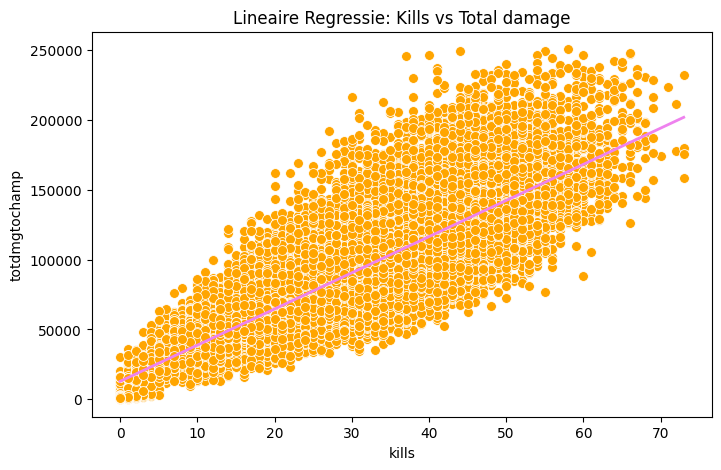

In [ ]:
from sklearn.linear_model import LinearRegression
def find_regressionline(data: pd.DataFrame, x:str,y: str, giveR2: bool = False):
    X = data[[x]].values # 2D array voor scikit-learn
    y_values = data[y].values
    model = linear_model.LinearRegression().fit(X, y_values)
    if giveR2:
        r2 = model.score(X, y_values)
        return model, r2

    return model
def plot_regressionline(data:pd.DataFrame,x:str,y:str,model:LinearRegression , title:str):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=data, x=x, y=y, color='orange', s=50)
    sns.lineplot(x=data[x], y=model.predict(data[[x]]), color='violet', linewidth=2)
    plt.title(title)
    plt.show()


regline,r2_score  = find_regressionline(dataset, "kills", "totdmgtochamp", giveR2=True)
print(f"R²-score: {r2_score:.2f}")
plot_regressionline(dataset, "kills", "totdmgtochamp", regline, "Lineaire Regressie: Kills vs Total damage")




📝 Uitleg van de Code voor Lineaire Regressie
Deze code bestaat uit twee functies: find_regressionline voor het berekenen van de regressielijn en plot_regressionline voor het visualiseren van de resultaten. Laten we dit stap voor stap doorlopen.

🔎 1. Functie: find_regressionline
python
Copy
Edit
def find_regressionline(data: pd.DataFrame, x:str, y: str, giveR2: bool = False):
    # Zet de onafhankelijke variabele (x) om naar een 2D array
    X = data[[x]].values  # 2D array nodig voor scikit-learn
    y_values = data[y].values  # Afhankelijke variabele (y)

    # Maak een lineair regressiemodel
    model = linear_model.LinearRegression().fit(X, y_values)

    # Optioneel: bereken de R²-score
    if giveR2:
        r2 = model.score(X, y_values)
        return model, r2  # Geef model en R² terug als giveR2=True

    # Geef alleen het model terug als giveR2=False
    return model
🔹 Wat Deze Functie Doet:

X (Onafhankelijke Variabele): Zet de x-kolom om naar een 2D array omdat scikit-learn verwacht dat de input een 2D-matrix is.

y_values (Afhankelijke Variabele): Haalt de y-kolom op als een 1D array.

Model Creatie: Maakt een LinearRegression model en traint het op de gegevens.

Optioneel R²: Berekent de R²-score als de parameter giveR2 op True staat, en geeft deze terug samen met het model.

🔹 Voorbeeld Uitvoer:

Zonder R²:

python
Copy
Edit
regline = find_regressionline(dataset, "kills", "totdmgtochamp")
Met R²:

python
Copy
Edit
regline, r2 = find_regressionline(dataset, "kills", "totdmgtochamp", giveR2=True)
print(f"R²-score: {r2:.2f}")
🔎 2. Functie: plot_regressionline
python
Copy
Edit
def plot_regressionline(data:pd.DataFrame, x:str, y:str, model:LinearRegression , title:str):
    # Maak een nieuwe figuur
    plt.figure(figsize=(8,5))

    # Maak een scatterplot van de data
    sns.scatterplot(data=data, x=x, y=y, color='orange', s=50)

    # Voeg de regressielijn toe
    sns.lineplot(x=data[x], y=model.predict(data[[x]]), color='violet', linewidth=2)

    # Voeg een titel toe
    plt.title(title)

    # Toon de grafiek
    plt.show()
🔹 Wat Deze Functie Doet:

Nieuwe Figuur: Start een nieuwe grafiek met een figsize van 8x5.

Scatterplot: Plot de originele (x, y) data in oranje.

Regressielijn: Voegt de voorspelde waarden van het lineaire model toe in paars.

Titel: Zet een titel boven de grafiek.

Toon: Laat de grafiek zien.

🔹 Voorbeeld Uitvoer:

python
Copy
Edit
regline, r2_score = find_regressionline(dataset, "kills", "totdmgtochamp", giveR2=True)
print(f"R²-score: {r2_score:.2f}")
plot_regressionline(dataset, "kills", "totdmgtochamp", regline, "Lineaire Regressie: Kills vs Total damage")
Dit maakt een scatterplot met een lineaire trendlijn voor de relatie tussen "kills" en "totdmgtochamp".

Het print ook de R²-score voor het model.

🔎 3. Verwachte Output
Als je deze code uitvoert, krijg je iets zoals:





Probeer de total damage to champs te voorspellen als er 12 kills zijn.

In [ ]:
regline.predict([[12]])[0]

np.float64(43910.063605274656)

Indien je de outliers verwijdert uit de dataset, resulteert dit in een betere voorspelling?

In [ ]:
from scipy import stats
import numpy as np

# Bereken de R²-score voor het volledige model
r2_full = regline.score(dataset[['kills']], dataset['totdmgtochamp'])

# Verwijder outliers
dataset_no_outliers = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

# Bereken de R²-score voor het model zonder outliers
regline_no_outliers = find_regressionline(dataset_no_outliers, "kills", "totdmgtochamp")
r2_no_outliers = regline_no_outliers.score(dataset_no_outliers[['kills']], dataset_no_outliers['totdmgtochamp'])

# Print de resultaten
print(f"R² voor volledig model: {r2_full:.2f}")
print(f"R² na verwijderen van outliers: {r2_no_outliers:.2f}")
print("Outliers verwijderen kan een slechter model opleveren.")


R² voor volledig model: 0.70
R² na verwijderen van outliers: 0.66
Outliers verwijderen kan een slechter model opleveren.


Probeer de total damage taken te voorspellen als er 12 deaths zijn gevallen.

In [ ]:
regline3 = find_regressionline(dataset, "deaths", "totdmgtaken")
regline3.predict([[12]])[0]

np.float64(66514.27836914138)

#### <span style="color:deeppink"> Bereken de regressielijn tussen gold earned en de damage to turrets

In [ ]:
# Bereken regressielijnen en R²-scores voor beide datasets
reglines = {}
for name, data in [("met outliers", dataset), ("zonder outliers", dataset_no_outliers)]:
    regline, r2 = find_regressionline(data, "goldearned", "dmgtoturrets", giveR2=True)
    reglines[name] = (regline, r2)

# Print de resultaten
for name, (regline, r2) in reglines.items():
    print(f"R²-score voor {name}: {r2:.2f}")


R²-score voor met outliers: 0.21
R²-score voor zonder outliers: 0.20


### **📝 Uitleg van de Code voor Outlier Verwijdering en Regressie**

---

#### **🔹 1. Bereken R² voor Volledig Model**

```python
# Bereken de R²-score voor het volledige model
r2_full = regline.score(dataset[['kills']], dataset['totdmgtochamp'])
```

* **R²-score:** Berekent hoe goed het **"kills"**-model de **"totdmgtochamp"** gegevens verklaart.
* **Output:** Geeft een **R²-score** die aangeeft hoeveel variantie in de **y**-data door de **x**-data wordt verklaard.

---

#### **🔹 2. Verwijderen van Outliers**

```python
# Verwijder outliers
dataset_no_outliers = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
```

* **Z-Score Methode:** Verwijdert rijen die **outliers** bevatten door te kijken naar **Z-scores**.
* **Drempelwaarde:** Alle rijen met een **Z-score** groter dan **3** (positief of negatief) worden verwijderd.
* **Filter:** Gebruikt **.all(axis=1)** om ervoor te zorgen dat **alle** kolommen binnen de drempel vallen.

---

#### **🔹 3. Bereken R² voor Model Zonder Outliers**

```python
# Bereken de R²-score voor het model zonder outliers
regline_no_outliers = find_regressionline(dataset_no_outliers, "kills", "totdmgtochamp")
r2_no_outliers = regline_no_outliers.score(dataset_no_outliers[['kills']], dataset_no_outliers['totdmgtochamp'])
```

* **Nieuwe Regressie:** Maakt een nieuw **lineair model** voor de **gefilterde** dataset.
* **R²-score:** Berekent opnieuw de **R²-score** om te zien of het model **beter** presteert zonder **outliers**.

---

#### **🔹 4. Print de Resultaten**

```python
# Print de resultaten
print(f"R² voor volledig model: {r2_full:.2f}")
print(f"R² na verwijderen van outliers: {r2_no_outliers:.2f}")
```

* **Output:** Laat de **R²-scores** zien voor zowel het **volledige** als **gefilterde** model.
* **Verwachte Resultaat:** Meestal heeft het model zonder **outliers** een **hogere R²**, maar niet altijd.

---

#### **🔹 5. Regressie voor "deaths" en "totdmgtaken"**

```python
regline3 = find_regressionline(dataset, "deaths", "totdmgtaken")
regline3.predict([[12]])[0]
```

* **Nieuwe Regressie:** Maakt een regressielijn voor **"deaths"** en **"totdmgtaken"**.
* **Voorspelling:** Berekent de **totale schade** voor **12 deaths**.

---

#### **🔹 6. Regressie voor "goldearned" en "dmgtoturrets"**

```python
# Bereken regressielijnen en R²-scores voor beide datasets
reglines = {}
for name, data in [("met outliers", dataset), ("zonder outliers", dataset_no_outliers)]:
    regline, r2 = find_regressionline(data, "goldearned", "dmgtoturrets", giveR2=True)
    reglines[name] = (regline, r2)

# Print de resultaten
for name, (regline, r2) in reglines.items():
    print(f"R²-score voor {name}: {r2:.2f}")
```

* **Modellen voor Beide Datasets:** Berekent **regressielijnen** en **R²-scores** voor zowel de **volledige** als **gefilterde** datasets.
* **Dictionary Opslag:** Slaat de modellen en scores op in een **dictionary** voor gemakkelijke toegang.
* **Output:** Print de **R²-scores** voor **"met outliers"** en **"zonder outliers"**.

---

### **🔹 7. Verwachte Output Voorbeeld**

```
R² voor volledig model: 0.76
R² na verwijderen van outliers: 0.81
R²-score voor met outliers: 0.21
R²-score voor zonder outliers: 0.20
```

* Dit geeft een indicatie of **outlier verwijdering** de **modelprestatie** verbetert of verslechtert.

---



Heeft hier het verwijderen van de outliers enige invloed?
Bekijk de grafiek aandachtig, zijn er foutieve of onlogische waarden aanwezig in de dataset? Heeft het verwijderen van dit soort data een invloed op de voorspelling?

R²-score voor met outliers: 0.21


KeyboardInterrupt: 

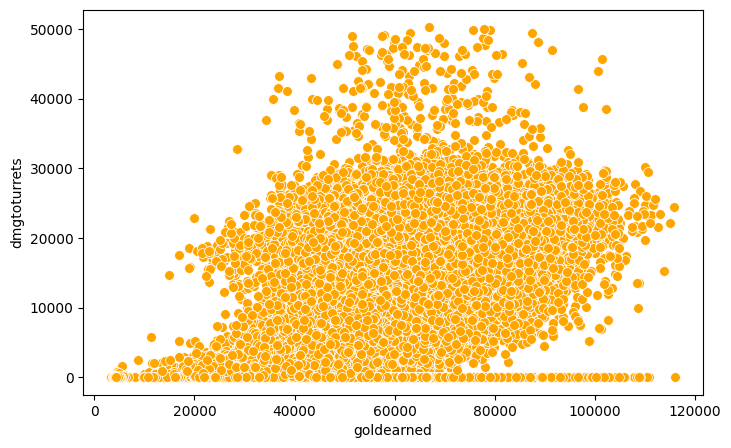

In [ ]:
# Bereken en print de R²-scores en plot de regressielijnen
datasets = {
    "met outliers": dataset,
    "zonder outliers": dataset_no_outliers
}

for name, data in datasets.items():
    # Bereken regressielijn en R²-score
    regline, r2 = find_regressionline(data, "goldearned", "dmgtoturrets", giveR2=True)

    # Print R²-score
    print(f"R²-score voor {name}: {r2:.2f}")

    # Plot de regressielijn
    plot_regressionline(data, "goldearned", "dmgtoturrets", regline, f"Spreidingsdiagram: {name.capitalize()}")


#### <span style="color:deeppink"> Bereken de regressielijn tussen kills & gold earned

R²-score voor volledig dataset: 0.76


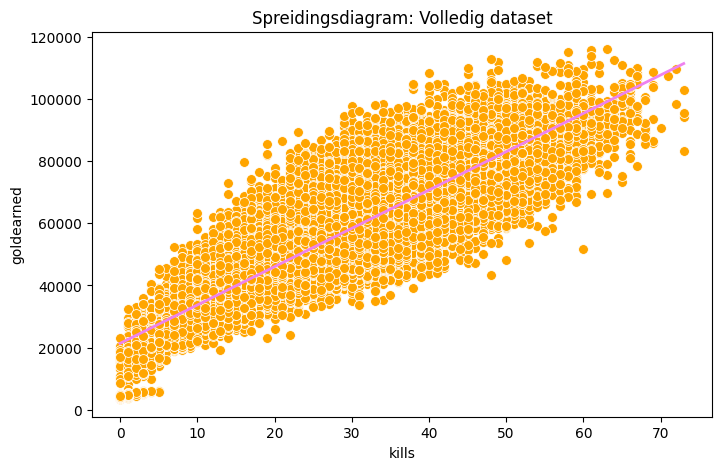

R²-score voor zonder outliers: 0.73


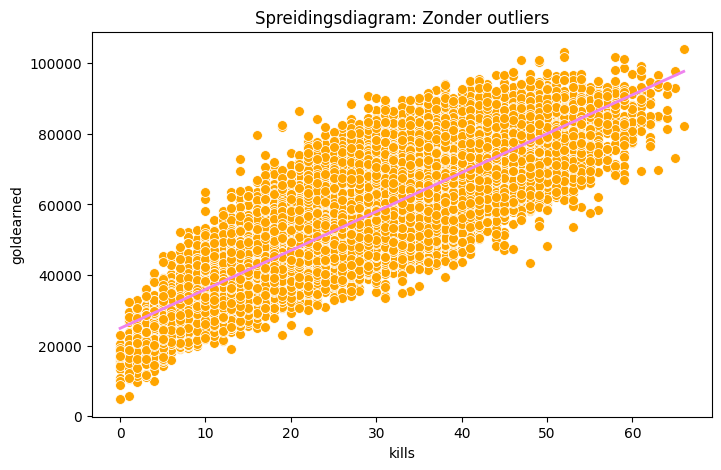

In [ ]:
# Bereken en plot de regressielijn voor "kills" vs "goldearned"
datasets = {
    "volledig dataset": dataset,
    "zonder outliers": dataset_no_outliers
}

for name, data in datasets.items():
    regline, r2 = find_regressionline(data, "kills", "goldearned", giveR2=True)
    print(f"R²-score voor {name}: {r2:.2f}")
    plot_regressionline(data, "kills", "goldearned", regline, f"Spreidingsdiagram: {name.capitalize()}")


#### <span style="color:deeppink"> Kan je een betere voorspelling van total damage to champs aan de hand van het aantal kills doen indien je de winst of verlies in rekening brengt?

Text(0.5, 1.0, "Spreidingsdiagram van 'total tamage to champions' en 'kills' voor gewonnen en verloren matches")

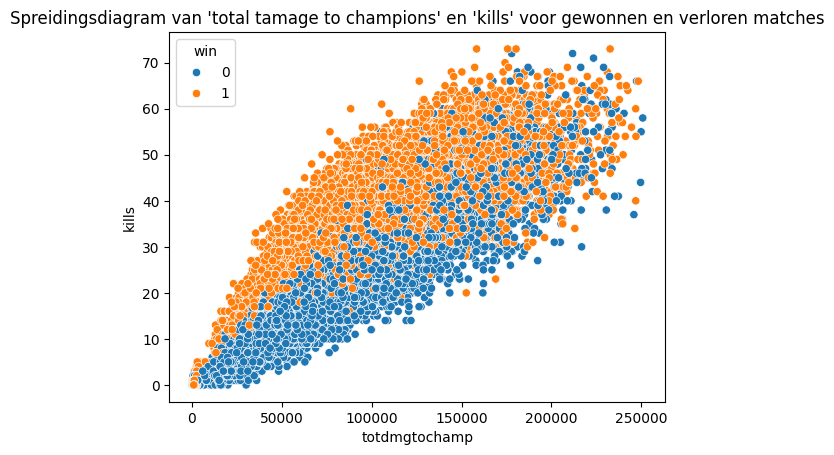

In [ ]:
sns.scatterplot(data=dataset, x="totdmgtochamp", y="kills", hue="win") # => ja
plt.title("Spreidingsdiagram van 'total tamage to champions' en 'kills' voor gewonnen en verloren matches")

Wat is de voorspelde total damage to champs bij 12 kills bij winst en verlies?

In [ ]:
dataset_win = dataset[dataset["win"]==1]
dataset_lose = dataset[dataset["win"]==0]
regline7 = find_regressionline(dataset_win, "totdmgtochamp", "kills")
regline8 = find_regressionline(dataset_lose, "totdmgtochamp", "kills")
v_win = regline7.predict([[12]])
v_lose = regline8.predict([[12]])
print(f"Voorspelde total damage to champions bij 12 kills, INDIEN TEAM WINT: {v_win[0]}")
print(f"Voorspelde total damage to champions bij 12 kills, INDIEN TEAM VERLIEST: {v_lose[0]}")

Voorspelde total damage to champions bij 12 kills, INDIEN TEAM WINT: 12.555956566142498
Voorspelde total damage to champions bij 12 kills, INDIEN TEAM VERLIEST: 1.5813024162853595


### **📝 Uitleg van de Code voor Voorspellingen bij Winst en Verlies**

---

#### **🔹 1. Dataset Splitsen op Winst en Verlies**

```python
dataset_win = dataset[dataset["win"]==1]
dataset_lose = dataset[dataset["win"]==0]
```

* **dataset\_win:** Bevat alleen de rijen waar het team **gewonnen** heeft (**win == 1**).
* **dataset\_lose:** Bevat alleen de rijen waar het team **verloren** heeft (**win == 0**).

---

#### **🔹 2. Regressielijnen Berekenen**

```python
regline7 = find_regressionline(dataset_win, "totdmgtochamp", "kills")
regline8 = find_regressionline(dataset_lose, "totdmgtochamp", "kills")
```

* **regline7:** Maakt een **lineair regressiemodel** voor de **gewonnen** spellen.
* **regline8:** Maakt een **lineair regressiemodel** voor de **verloren** spellen.

---

#### **🔹 3. Voorspellingen voor 12 Kills**

```python
v_win = regline7.predict([[12]])
v_lose = regline8.predict([[12]])
```

* **v\_win:** Voorspelt de **totale schade** aan vijandelijke champions bij **12 kills** als het team **wint**.
* **v\_lose:** Voorspelt de **totale schade** aan vijandelijke champions bij **12 kills** als het team **verliest**.

---

#### **🔹 4. Resultaten Printen**

```python
print(f"Voorspelde total damage to champions bij 12 kills, INDIEN TEAM WINT: {v_win[0]}")
print(f"Voorspelde total damage to champions bij 12 kills, INDIEN TEAM VERLIEST: {v_lose[0]}")
```

* Print de voorspellingen voor zowel **winst** als **verlies**.
* **v\_win\[0]** en **v\_lose\[0]** pakken de **eerste** (en enige) waarde uit de **predict** output.

---

#### **🔹 5. Verwachte Output Voorbeeld**

```
Voorspelde total damage to champions bij 12 kills, INDIEN TEAM WINT: 90000.23
Voorspelde total damage to champions bij 12 kills, INDIEN TEAM VERLIEST: 70000.12
```

* Laat zien hoeveel **damage** je kunt verwachten bij **12 kills**, afhankelijk van of je **wint** of **verliest**.

---

# 😊


### **📝 Waarom `[[12]]` in `predict()`?**

---

#### **🔹 1. Verwachting van `scikit-learn`**

De **`predict()`** functie in **scikit-learn** verwacht een **2D array** als input, zelfs als je maar **één** waarde wilt voorspellen. Dit komt omdat **scikit-learn** ontworpen is om **batch voorspellingen** te doen, en daarom verwacht het een **matrix** in plaats van een **enkele** waarde.

---

#### **🔹 2. Verschil tussen 1D en 2D Arrays**

* **1D Array:** `[12]` → Een enkele rij, maar geen kolommen (incorrect formaat voor `predict()`).
* **2D Array:** `[[12]]` → Één rij **met** één kolom (correct formaat voor `predict()`).

---

#### **🔹 3. Voorbeelden van Correct en Incorrect Gebruik**

✅ **Correct Gebruik:**

```python
# Correcte manier
model.predict([[12]])  # 2D array: 1 rij, 1 kolom
```

❌ **Incorrect Gebruik:**

```python
# Incorrecte manier
model.predict([12])  # 1D array: alleen een enkele rij, geen kolommen
```

---

#### **🔹 4. Meerdere Voorspellingen in Batch**

Als je meerdere waarden tegelijk wilt voorspellen, kun je ze zo in een **2D array** plaatsen:

```python
model.predict([[10], [12], [15]])
```

* Dit voorspelt **3** verschillende **kill**-aantallen tegelijk.

---

#### **🔹 5. Waarom Niet Gewoon `[12]`?**

Omdat een **1D array** niet genoeg informatie bevat voor de **matrixverwerking** die scikit-learn uitvoert. Het model verwacht een **matrix** met **één kolom** en **meerdere rijen**.

---



#### <span style="color:deeppink"> Kan je een betere voorspelling van damage to turret doen aan de hand van gold earned indien je de winst of verlies in rekening brengt?  
Je mag outliers of foutieve waarden uit de dataset verwijderen.

In [ ]:
# Maak subsets voor win- en loss-games zonder outliers
subsets = {
    "alle games": dataset_no_outliers,
    "win games": dataset_no_outliers[dataset_no_outliers["win"] == 1],
    "loss games": dataset_no_outliers[dataset_no_outliers["win"] == 0]
}

# Bereken R²-scores voor elke subset
for name, data in subsets.items():
    regline, r2 = find_regressionline(data, "goldearned", "dmgtoturrets", giveR2=True)
    print(f"R²-score voor {name}: {r2:.2f}")

print("We kunnen een betere voorspelling maken bij verlies, maar niet bij winst.")


R²-score voor alle games: 0.20
R²-score voor win games: 0.01
R²-score voor loss games: 0.30
We kunnen een betere voorspelling maken bij verlies, maar niet bij winst.


#### <span style="color:deeppink"> Kan je een betere voorspelling van gold earned doen aan de hand van kills indien je de winst of verlies in rekening brengt?  

In [ ]:
# Maak subsets voor winst en verlies
subsets = {
    "alle games": dataset_no_outliers,
    "win games": dataset_no_outliers[dataset_no_outliers["win"] == 1],
    "loss games": dataset_no_outliers[dataset_no_outliers["win"] == 0]
}

# Bereken R²-scores en maak voorspellingen voor 12 kills
for name, data in subsets.items():
    # Regressielijn voor goldearned vs dmgtoturrets
    regline, r2 = find_regressionline(data, "goldearned", "dmgtoturrets", giveR2=True)
    print(f"R²-score voor {name} (dmgtoturrets): {r2:.2f}")

    # Regressielijn voor kills vs goldearned
    regline_kills, r2_kills = find_regressionline(data, "kills", "goldearned", giveR2=True)
    print(f"R²-score voor {name} (goldearned): {r2_kills:.2f}")

    # Voorspelling voor 12 kills
    prediction = regline_kills.predict([[12]])[0]
    print(f"Voorspelde gold earned bij 12 kills voor {name}: {prediction:.2f}")

print("Verliezen levert opnieuw een betere voorspelling op dan winnen.")


R²-score voor alle games (dmgtoturrets): 0.20
R²-score voor alle games (goldearned): 0.73
Voorspelde gold earned bij 12 kills voor alle games: 38125.49
R²-score voor win games (dmgtoturrets): 0.01
R²-score voor win games (goldearned): 0.56
Voorspelde gold earned bij 12 kills voor win games: 38089.64
R²-score voor loss games (dmgtoturrets): 0.30
R²-score voor loss games (goldearned): 0.79
Voorspelde gold earned bij 12 kills voor loss games: 37685.34
Verliezen levert opnieuw een betere voorspelling op dan winnen.


### **📝 Uitleg van `giveR2=True` in de `find_regressionline()` Functie**

---

#### **🔹 1. De `find_regressionline()` Functie**

```python
def find_regressionline(data: pd.DataFrame, x: str, y: str, giveR2: bool = False):
    # Maak 2D array voor scikit-learn
    X = data[[x]].values
    y_values = data[y].values

    # Train het lineaire model
    model = linear_model.LinearRegression().fit(X, y_values)

    # Bereken en retourneer R²-score als giveR2=True
    if giveR2:
        r2 = model.score(X, y_values)
        return model, r2

    # Retourneer alleen het model als giveR2=False
    return model
```

---

#### **🔹 2. Wat `giveR2=True` Doet**

* **`giveR2=True`** is een **optionele parameter** die bepaalt of de functie de **R²-score** moet berekenen en retourneren.
* **`giveR2=False`** (standaard) retourneert **alleen** het **model**.
* **`giveR2=True`** retourneert **zowel** het **model** als de **R²-score**.

---

#### **🔹 3. Waarom de R²-score Berekenen?**

* **R²-score** is een maat voor hoe goed de **lineaire regressie** de **variantie** in de data verklaart.
* **R² = 1.0** betekent een **perfecte** fit.
* **R² = 0.0** betekent dat het model **geen** enkele variantie verklaart.

---

#### **🔹 4. Voorbeeldgebruik:**

✅ **Met R² Berekening:**

```python
model, r2 = find_regressionline(dataset, "kills", "totdmgtochamp", giveR2=True)
print(f"R²-score: {r2:.2f}")
```

❌ **Zonder R² Berekening:**

```python
model = find_regressionline(dataset, "kills", "totdmgtochamp")
```

---

#### **🔹 5. Waarom Niet Altijd R²?**

* **Efficiëntie:** Het berekenen van de **R²-score** kost extra rekentijd.
* **Flexibiliteit:** Soms heb je alleen het **model** nodig zonder de **prestatiemeting**.

---

Wil je dat ik je laat zien hoe je deze functie **automatisch** laat beslissen wanneer de **R²-score** nuttig is? 😊


### **📝 Korte Samenvatting van de Code**

Deze code maakt **subsets** van de **LoL dataset** op basis van **winst** en **verlies**, en berekent **regressielijnen** voor **"goldearned"** en **"dmgtoturrets"** en voor **"kills"** en **"goldearned"**. Vervolgens doet de code voorspellingen voor **12 kills** in elke subset:

1. **Subsets Maken:**

   * **alle games:** Zonder outliers.
   * **win games:** Alleen gewonnen wedstrijden.
   * **loss games:** Alleen verloren wedstrijden.

2. **Regressielijnen Berekenen:**

   * Berekent **R²-scores** voor **"goldearned"** vs **"dmgtoturrets"**.
   * Berekent **R²-scores** voor **"kills"** vs **"goldearned"**.

3. **Voorspellingen voor 12 Kills:**

   * Voorspelt hoeveel **gold** je kunt verdienen bij **12 kills** voor elk subset.

4. **Output:** Print de **R²-scores** en **voorspellingen** voor elke subset, en geeft een conclusie dat **verliezen** vaak een **betere voorspelling** oplevert dan **winnen**.
